# Statistics Case Study-1

In [3]:
import pandas as pd 
df = pd.read_csv('Students_Performance.csv')

In [6]:
columns = df.columns
print("Columns in the dataset:", columns)
print(df)

Columns in the dataset: Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')
     gender race/ethnicity parental level of education         lunch  \
0    female        group C            some high school  free/reduced   
1    female        group B                 high school  free/reduced   
2    female        group B            some high school  free/reduced   
3    female        group B                some college      standard   
4    female        group C                some college  free/reduced   
..      ...            ...                         ...           ...   
995    male        group E                some college      standard   
996    male        group A                some college      standard   
997    male        group D                some college      standard   
998    male        group E          associate's degree  free/reduced 

# Find out how many males and females participated in the test

In [9]:
gender_counts = df['gender'].value_counts()
print(gender_counts)

female    518
male      482
Name: gender, dtype: int64


# What do you think about the student's parental level of education?


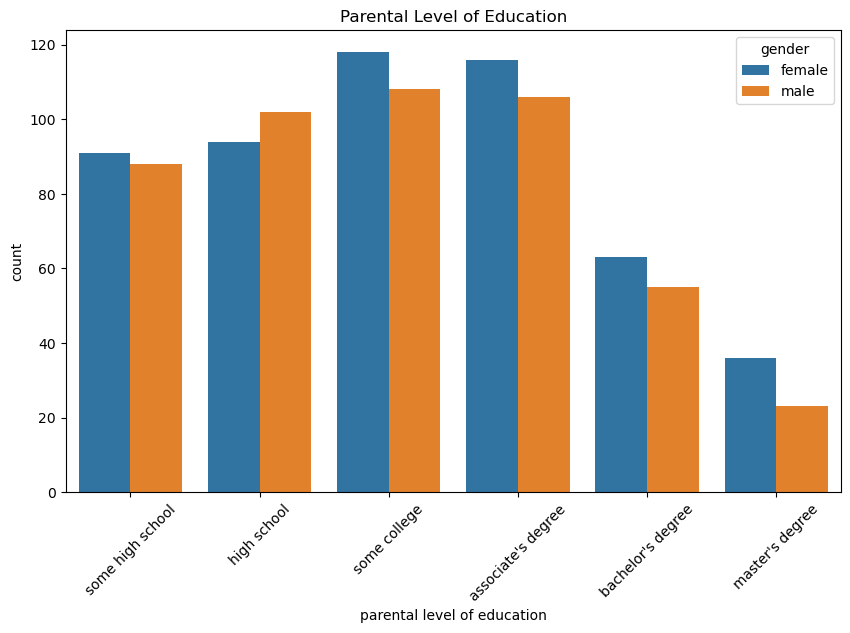

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)
plt.title("Parental Level of Education")
sns.countplot(data=df, x='parental level of education', hue='gender')
plt.show()


# Who scores the most on average for math, reading and writing based on-

i.Gender 
ii. Test preparation course


In [14]:
# The average scores by gender

average_scores_by_gender = df.groupby('gender').mean()[['math score', 'reading score', 'writing score']]

print(average_scores_by_gender)


        math score  reading score  writing score
gender                                          
female   63.376448      72.590734      72.467181
male     68.821577      65.545643      63.446058


C:\Users\USER\AppData\Local\Temp\ipykernel_7544\4222164384.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_scores_by_gender = df.groupby('gender').mean()[['math score', 'reading score', 'writing score']]


In [16]:
# The average scores by test preparation course

average_scores_by_course = df.groupby('test preparation course').mean()[['math score', 'reading score', 'writing score']]

print(average_scores_by_course)


                         math score  reading score  writing score
test preparation course                                          
completed                  69.96648      74.175978      74.684358
none                       63.78972      66.417445      64.457944


C:\Users\USER\AppData\Local\Temp\ipykernel_7544\1243840339.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_scores_by_course = df.groupby('test preparation course').mean()[['math score', 'reading score', 'writing score']]


# What do you think about the scoring variation for math, reading and writing based on-

i. Gender
ii. Test preparation course

In [17]:
# The variance of scores by gender

variance_scores_by_gender = df.groupby('gender').var()[['math score', 'reading score', 'writing score']]

print(variance_scores_by_gender)


        math score  reading score  writing score
gender                                          
female  256.958593     207.677438     220.369327
male    211.889097     200.211010     202.413924


C:\Users\USER\AppData\Local\Temp\ipykernel_7544\2208828421.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  variance_scores_by_gender = df.groupby('gender').var()[['math score', 'reading score', 'writing score']]


In [19]:
# The variance of scores by test preparation course

variance_scores_by_course = df.groupby('test preparation course').var()[['math score', 'reading score', 'writing score']]

print(variance_scores_by_course)


                         math score  reading score  writing score
test preparation course                                          
completed                210.884027     183.265864     175.202612
none                     246.668662     213.419851     226.251739


C:\Users\USER\AppData\Local\Temp\ipykernel_7544\885248768.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  variance_scores_by_course = df.groupby('test preparation course').var()[['math score', 'reading score', 'writing score']]


# Bonus points to the top 25% of students based on their math score-

In [21]:
# The top 25% threshold for math scores

top_25_threshold = df['math score'].quantile(0.75)

# The students with math scores in the top 25%

top_25_students = df[df['math score'] >= top_25_threshold]

print(top_25_students)


     gender race/ethnicity parental level of education         lunch  \
414  female        group A                 high school  free/reduced   
415  female        group B             master's degree  free/reduced   
416  female        group B           bachelor's degree  free/reduced   
417  female        group B             master's degree      standard   
418  female        group B                 high school      standard   
..      ...            ...                         ...           ...   
995    male        group E                some college      standard   
996    male        group A                some college      standard   
997    male        group D                some college      standard   
998    male        group E          associate's degree  free/reduced   
999    male        group E           bachelor's degree      standard   

    test preparation course  math score  reading score  writing score  
414               completed          77             88         

# Case Study-2 Testing of Hypothesis

In [30]:
import pandas as pd 
import scipy.stats as stats

dataf = pd.read_csv('Sales_add.csv')
print(dataf)

       Month      Region      Manager  Sales_before_digital_add  \
0    Month-1  Region - A  Manager - A                    132921   
1    Month-2  Region - A  Manager - C                    149559   
2    Month-3  Region - B  Manager - A                    146278   
3    Month-4  Region - B  Manager - B                    152167   
4    Month-5  Region - C  Manager - B                    159525   
5    Month-6  Region - A  Manager - B                    137163   
6    Month-7  Region - C  Manager - C                    130625   
7    Month-8  Region - A  Manager - A                    131140   
8    Month-9  Region - B  Manager - C                    171259   
9   Month-10  Region - C  Manager - B                    141956   
10  Month-11  Region - B  Manager - C                    159339   
11  Month-12  Region - A  Manager - A                    178939   
12  Month-13  Region - B  Manager - A                    145062   
13  Month-14  Region - A  Manager - A                    15151

In [32]:
columns = dataf.columns
print(columns)

Index(['Month', 'Region', 'Manager', 'Sales_before_digital_add',
       'Sales_After_digital_add'],
      dtype='object')


# Whether there is any increase in sales after stepping into digital marketing?

In [37]:
sales_before = dataf['Sales_before_digital_add']
sales_after = dataf['Sales_After_digital_add']

# Perform a one-sample t-test
t_stat, p_value = stats.ttest_rel(sales_after,sales_before)

alpha = 0.05  # Significance level

if p_value < alpha:
    print("There is a significant increase in sales after implementing digital marketing.")
else:
    print("There is no significant increase in sales after implementing digital marketing.")


There is a significant increase in sales after implementing digital marketing.


# Whether there is any dependency between "Region" and "Manager"?

In [38]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(dataf['Region'], dataf['Manager'])

# Perform the chi-squared test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

alpha = 0.05  # Significance level

if p_value < alpha:
    print("There is a significant association between Region and Manager.")
else:
    print("There is no significant association between Region and Manager.")


There is no significant association between Region and Manager.
